In [1]:
from nonasymptotic.envs import StraightLine
from nonasymptotic.prm import SimplePRM

import matplotlib.pyplot as plt
import numpy as np

In [2]:
prm_env_2d = StraightLine(dim=2, delta_clearance=0.5)
prm = SimplePRM(0.2, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env, prm_env_2d.distance_to_path)
prm.grow_to_n_samples(1000)

# plt.figure()
# for u, v in prm.g_prm.iterEdges():
#     coords_u = prm.samples[u]
#     coords_v = prm.samples[v]
# 
#     plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
# 
# plt.show()

# some other computations to help other visual tests later on:
print('N Components: %i' % len(prm.g_cc.getComponents()))
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


Tue Jan  9 22:38:25 2024 Building RP forest with 11 trees
Tue Jan  9 22:38:27 2024 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	Stopping threshold met -- exiting after 2 iterations
Tue Jan  9 22:38:36 2024 Worst tree score: 0.99900000
Tue Jan  9 22:38:36 2024 Mean tree score: 0.99990909
Tue Jan  9 22:38:36 2024 Best tree score: 1.00000000
Tue Jan  9 22:38:38 2024 Forward diversification reduced edges from 30000 to 4151
Tue Jan  9 22:38:41 2024 Reverse diversification reduced edges from 4151 to 4151
Tue Jan  9 22:38:44 2024 Degree pruning reduced edges from 3686 to 3686
Tue Jan  9 22:38:44 2024 Resorting data and graph based on tree order
Tue Jan  9 22:38:44 2024 Building and compiling search function
N Components: 1
N nodes: 1000
N edges: 6230


In [3]:
# do some connection queries with some existing points
s = np.array([0., 0.])
g = np.array([1., 0.])

sol_dist, sol_path = prm.query_best_solution(s, g)
sol_path = np.concatenate([[s], sol_path, [g]])

# plt.figure()

# plot the existing prm
# for u, v in prm.g_prm.iterEdges():
#     coords_u = prm.samples[u]
#     coords_v = prm.samples[v]
# 
#     plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
# 
# for i in range(sol_path.shape[0] - 1):
#     u = sol_path[i]
#     v = sol_path[i+1]
#     plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
# 
# plt.plot()
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


N nodes: 1000
N edges: 6230


In [4]:
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[1]))
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[2]))
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[3]))
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[4]))
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[5]))
# print(prm.g_spsp.getDistance(prm.swcr[0], prm.swcr[6]))
# prm.g_sp_lookup

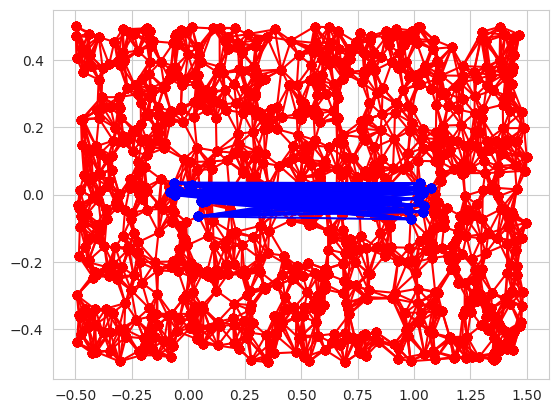

In [5]:
pairs, _ = prm.query_all_graph_connections(s, g)
plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for u, v in pairs:
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.show()


In [6]:
# just testing to see if we can compute the shortest paths

# line_dir = np.array([1.0] + [0.0] * (prm_env_2d.dim - 1)).reshape(1, -1)
# 
# # use an SDF to filter the prm points
# # first, project to the line (use fact that line param is 0->1 in d0):
# samples_proj_clip = np.clip(prm.samples[:, 0], 0.0, 1.0).reshape(-1, 1)
# within_conn_r_of_line = np.linalg.norm(prm.samples - samples_proj_clip * line_dir, axis=1) <= prm.conn_r
# samples_in_conn_r = prm.samples[within_conn_r_of_line]
# samples_ids_in_conn_r = np.arange(prm.samples.shape[0])[within_conn_r_of_line]
# 
# import networkit as nk
# spsp = nk.distance.SPSP(prm.g_prm, samples_ids_in_conn_r)
# spsp.setTargets(samples_ids_in_conn_r)
# spsp.run()
# 
# spsp.getDistance(samples_ids_in_conn_r[0], samples_ids_in_conn_r[1])
# spsp.getDistance(samples_ids_in_conn_r[5], samples_ids_in_conn_r[2])


In [28]:
prm_env_2d.is_prm_epsilon_delta_complete(prm, 0.2, n_samples_per_check=10, timeout=1.0, vis=True)

not ed complete! failing query: [0.29163614 0.49163614]


False